# Ex 1: One-way ANOVA

Usually with anova we assume that he data sets are samples of the same distribution _(i.e., the nully hypothesis is that their means are equal)_. If we reject the $H_0$ then this implies that at least one of the means are different.

![](https://i.chzbgr.com/full/8396848896/hF2368E27/)

For this example we will use a one-way ANOVA: Senario - there are three archers participating in an archery contest. They are shooting at targets with 10 evenly spaced concentric rings. The rigs have values 1-10 (10 highest). Each participates shoots 6 arrows. 

[Source for Walkthrough](http://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/)

In [28]:
import numpy as np
import pandas as pd
from scipy import stats

# Archery Results
pat = [5, 4, 4, 3, 9, 4]
jack = [4, 8, 7, 5, 1, 5]
alex = [9,9,8,10,4,10]

### Hypothesis

Based on the results above for each players, we would like to find out __who is the best archer__. Therefore our a$H_0$ is that all means are equal:

$H_0:μ_1=μ_2=μ_3$

Therefore rejecthing the $H_0$ means that there is a significant difference between at least two of the archer, therefore we define our alternative hypothsis as:

$H_A$: at least two means are significantly different

Before we continue to test this hypothesis we need to define our __significance level__ which will be our basis of making the decision wiether to reject or fail to reject the $H_0$. For this example we will define the significance level of our test to be α=0.05 which corresponds to a 95% confidence. 

### One-Way ANOVA

We will use the `SciPy` function `f_oneway()` to perform a oneway ANOVA which will return us the `F` favlue and `p` p-value from the test, whcih we can then used to make a conclusion on whether to reject or fail to reject the null hypothesis

In [30]:
f, p = stats.f_oneway(pat, jack, alex)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 4.4882729211087415
P value: 0.029667763955533364 



As we can see the F-value = 4.48 and p-value = 0.0297. With a __p-value = 0.03 ≤ 0.05 we reject the null hypotehsis__ and conclude that at least one of the means is different from at least one of the other populations _(e.g., not all archers perform equally)_. However, this is not a statifying result. We can not simply stop here and conclude yes, one of these archers we know are better than the other. To find out which archer has the differing performance we must conduct a __Post Hoc Test__.

### Post Hoc Test (Tukey Test)

The __Tukey range test__ is commonly used after reject the null hypothesis during an ANOVA test to additionally test and compare all possible pairs. We can use the Tukey test to percisely identify differences between two means that's greater than the expected standard error. 

To perform the Tukey test we will use the `statsmodels` library. 

In [32]:
## import library
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

we will use the `pairwise_tukeyhsd` to calculate all the pairwise comparisions using the `MultiComparision` 

Now that we have loaded the required library we can run the test

In [82]:
data = pd.DataFrame(np.array([('Pat', 5),('Pat', 4),('Pat', 4),('Pat', 3),
                       ('Pat', 9),('Pat', 4),('Jack', 4),('Jack', 8),
                       ('Jack', 7),('Jack', 5),('Jack', 1),('Jack', 5),
                       ('Alex', 9),('Alex', 8),('Alex', 8),('Alex', 10),
                       ('Alex', 5),('Alex', 10)],
                        dtype = [('Archer','|U5'),('Score', '<i8')]))

In [85]:
mc = MultiComparison(data['Score'], data['Archer'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 Alex   Jack  -3.3333  -6.5755 -0.0911  True 
 Alex   Pat     -3.5   -6.7422 -0.2578  True 
 Jack   Pat   -0.1667  -3.4089  3.0755 False 
---------------------------------------------
['Alex' 'Jack' 'Pat']


The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. 

We can see from the Tukey test that `Alex` significantly differs from the other two archers, by looking at the `meandiff` column that evidences there is a significant evidence to reject Ho for the groups `Alex-Jack` and `Alex-Pat`.

The test also shows the difference between the group means (the meandiff column).

$μ_jack − μ_alex=−3.3333$

$μ_pat − μ_alex=−3.5$ 

This leads to the conclusion that Alex is the best archer in the group.

group1,group2,meandiff,lower,upper,reject
Alex,Jack,-3.3333,-6.5755,-0.0911,True
Alex,Pat,-3.5,-6.7422,-0.2578,True
Jack,Pat,-0.1667,-3.4089,3.0755,False


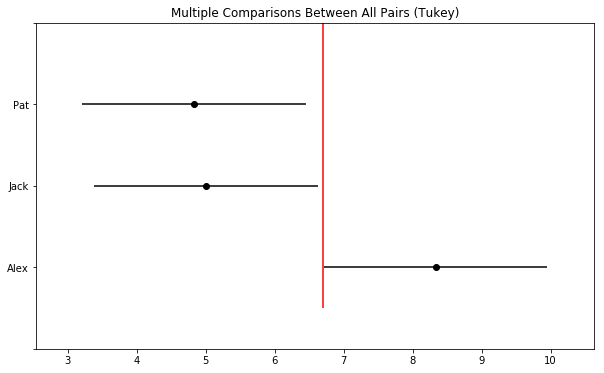

In [95]:
tukey = pairwise_tukeyhsd(endog=data['Score'],     # Data
                          groups=data['Archer'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=6.7,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

The 95% confidence interval plot reinforces the result visually: only 1 other group is likely to overlap with Alex which is Jac. 

## Ex 2: 

[walkthrough source](http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/)